In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.io_utils import *
from src.metrics import *
from src.viz import *

df = read_data("data/ecommerce_sales.csv")

df_clean = clean_data(df)

print("---" * 50)
print()
print("Here is a sample of our data:")
print()
print(df_clean.sample(3))
print()
print("---" * 50)

------------------------------------------------------------------------------------------------------------------------------------------------------

Here is a sample of our data:

      order_id       date      city     category    price  units  revenue
1503    101503 2024-05-30     Malmö       Sports   453.74      5   2268.7
516     100516 2024-01-01  Västerås  Electronics  1037.70      4   4150.8
66      100066 2024-04-13   Uppsala       Sports   388.20      3   1164.6

------------------------------------------------------------------------------------------------------------------------------------------------------


## Total revenue, total units sold, average order value

In [2]:
print("---" * 50)
print()
print(f"In the first 6 months of 2024 we sold a total of {total_units(df_clean)} units.\n"
      f"The total revenue is {total_revenue(df_clean)} sek and the average order value is {average_order(df_clean)} sek.")
print()
print("---" * 50)

------------------------------------------------------------------------------------------------------------------------------------------------------

In the first 6 months of 2024 we sold a total of 7463 units.
The total revenue is 3502767.23 sek and the average order value is 1401.11 sek.

------------------------------------------------------------------------------------------------------------------------------------------------------


## Revenue per category

------------------------------------------------------------------------------------------------------------------------------------------------------

The top 3 categories per revenue are:
      category  tot_rev_cat
0  Electronics   1364228.07
1       Sports    734653.42
2     Clothing    586744.91.
Figure(700x500)

------------------------------------------------------------------------------------------------------------------------------------------------------


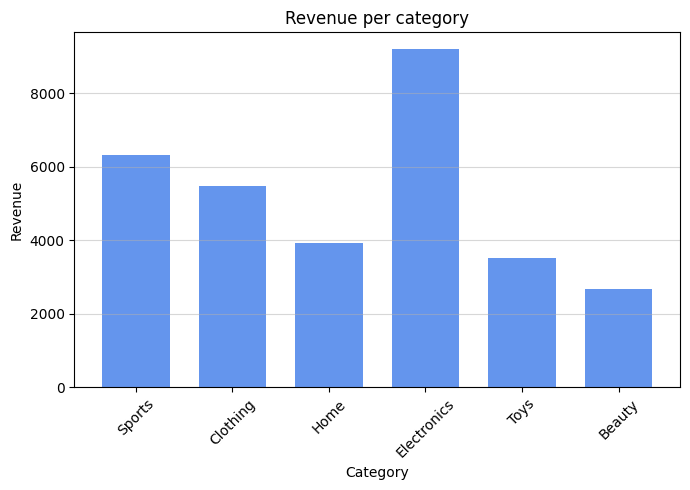

In [3]:
print("---" * 50)
print()
print(f"The top 3 categories per revenue are:\n"
      f"{revenue_per_category(df_clean).head(3)}.")
print(plot_per_category(df_clean))
print()
print("---" * 50)

## Revenue per city

------------------------------------------------------------------------------------------------------------------------------------------------------

The top 3 cities per revenue are:
        city  tot_rev_city
0  Stockholm    1227201.94
1   Göteborg     859019.65
2      Malmö     567926.32.
Figure(700x500)

------------------------------------------------------------------------------------------------------------------------------------------------------


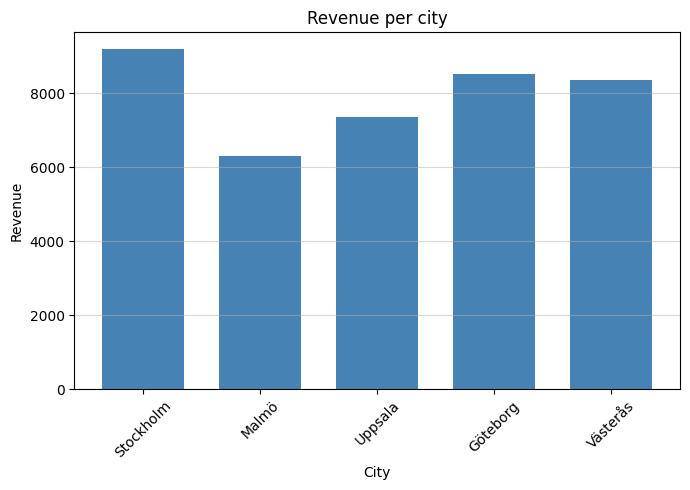

In [4]:
print("---" * 50)
print()
print(f"The top 3 cities per revenue are:\n"
      f"{revenue_per_city(df_clean).head(3)}.")
print(plot_per_city(df_clean))
print()
print("---" * 50)

## Revenue per month

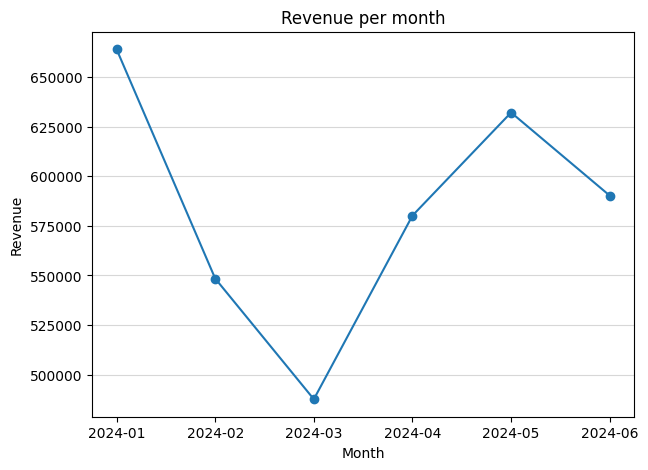

In [5]:
df_monthly_revenue = revenue_per_month(df_clean)

fig, ax = plt.subplots(figsize=(7,5))
line(ax, df_monthly_revenue["month"], df_monthly_revenue["rev_per_month"],"Revenue per month", "Month", "Revenue")
plt.show()

In [6]:
piv = pd.pivot_table(
    df_clean,
    index="city",
    columns="category",
    values="order_id",
    aggfunc="nunique",
    fill_value=0,
    margins=True)

piv.to_csv("data/pivot_city_x_category.csv")
piv.head()

category,Beauty,Clothing,Electronics,Home,Sports,Toys,All
city,,,,,,,
Göteborg,56,104,145,136,91,54,586
Malmö,31,69,104,83,70,39,396
Stockholm,86,181,220,163,169,80,899
Uppsala,37,86,101,65,56,36,381
Västerås,31,69,48,43,29,18,238


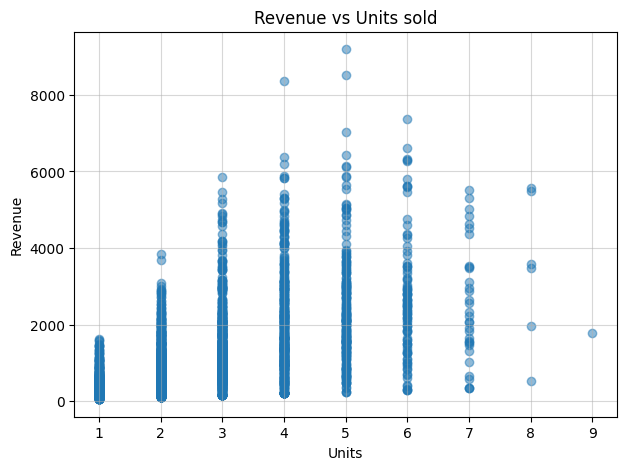

Orders with 1-5 units make up the majority. Some orders with few units generate high revenue (probably expensive items).
Larger orders (6-9 units) tend to have a wide range of revenue but are less frequent.


In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
scatter(ax, df_clean["units"], df_clean["revenue"],"Revenue vs Units sold", "Units", "Revenue")
plt.show()

print("Orders with 1-5 units make up the majority. Some orders with few units generate high revenue (probably expensive items).\n"
      "Larger orders (6-9 units) tend to have a wide range of revenue but are less frequent.\n"
      "No strict linear relationship.")

## Rekommendationer:
- High sales in Electronics and Sports
- Support the teams in Stockholm and Göteborg in January and May
- z